In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
data

array([[3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
data_train[0]

array([8, 8, 9, ..., 9, 0, 5], dtype=int64)

In [6]:
X_train[2]

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
Y_train[0]

8

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# W1: The weight matrix for the first layer (hidden layer), shape (10, 784). It maps the 784 input features to 10 hidden units.
# b1: The bias vector for the first layer, shape (10, 1).
# W2: The weight matrix for the second layer (output layer), shape (10, 10). It maps the 10 hidden units to 10 output units (for the 10 digit classes).
# b2: The bias vector for the second layer, shape (10, 1).

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)

# This function outputs Z directly if Z is positive; otherwise, it outputs 0.
# Why: ReLU introduces non-linearity into the model, helping the neural network learn more complex patterns. It also helps mitigate the vanishing gradient problem.

In [10]:
np.exp([1, 2, 3, 4, 5])

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [11]:
sum(np.exp([1, 2, 3, 4, 5]))

233.2041839862982

In [12]:
# The value of 
# e, also known as Euler's number, is approximately:
# 𝑒 ≈ 2.718281828459045

In [13]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [14]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# The forward pass computes the predictions of the network given the input X.

In [15]:
def ReLU_deriv(Z):
    return Z > 0

# Why: This derivative is used in backpropagation to update weights.

In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 
    # one_hot_Y is 2d array of zeros, np.arange creates an array with values (0 - size-1) and Y is in input array. Numpy arrays leverages NumPy's advanced indexing, which allows it to iterate through both arrays (np.arange(Y.size) and Y) simultaneously.
    
    one_hot_Y = one_hot_Y.T
    # Transpose Reason - Before transposing, one_hot_Y has a shape of (number of examples, number of classes). This means one_hot_Y is a matrix where each row represents a different example, and each column represents a different class.
    # In the context of neural networks, especially when working with matrices, it’s often more convenient to have the columns represent different examples rather than rows.
    
    return one_hot_Y

# 1 at the correct label digit. eg: if digit is 2 then 0, 0 ,1, 0 ,0 ,0, 0, 0, 0, 0

In [17]:
one_hot(np.array([1, 2, 3, 9, 5]))

# maximum is 5 so 6 rows are created 0-5 and for each value the particular index is marked as one. eg: if zero would have been there at third index then third index of zeroth row would be 1.

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [18]:
Y_train

array([8, 8, 9, ..., 9, 0, 5], dtype=int64)

In [19]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [20]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)


# This function is used to determine the predicted class for each example after forward propagation.
# if A2 is A2 = np.array([[0.1, 0.2, 0.4],
                    #    [0.6, 0.5, 0.3],
                    #    [0.3, 0.3, 0.3]])
# The function would return [1, 1, 0] because the highest probability for the first and second examples is in the second row (index 1), and for the third example, it's in the first row (index 0).

In [22]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#This is simple to understand, total correct predictions divided by total predictions

In [23]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


# Putting everything together for gradient descent

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
# Learning Rate = 0.1, you can adjust as per needs.
# 500 Iterations 

Iteration:  0
[5 9 5 ... 5 2 3] [8 8 9 ... 9 0 5]
0.12109756097560975
Iteration:  10
[5 7 8 ... 8 2 3] [8 8 9 ... 9 0 5]
0.2338048780487805
Iteration:  20
[5 1 8 ... 8 0 3] [8 8 9 ... 9 0 5]
0.3485121951219512
Iteration:  30
[5 1 8 ... 8 0 6] [8 8 9 ... 9 0 5]
0.4065121951219512
Iteration:  40
[5 1 8 ... 8 0 6] [8 8 9 ... 9 0 5]
0.46126829268292685
Iteration:  50
[3 1 9 ... 8 0 5] [8 8 9 ... 9 0 5]
0.5393414634146342
Iteration:  60
[3 2 9 ... 8 0 5] [8 8 9 ... 9 0 5]
0.584
Iteration:  70
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.6146829268292683
Iteration:  80
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.6389756097560976
Iteration:  90
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.6599756097560976
Iteration:  100
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.6753414634146342
Iteration:  110
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.6889268292682926
Iteration:  120
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.6996585365853658
Iteration:  130
[8 8 9 ... 7 0 5] [8 8 9 ... 9 0 5]
0.71
Iteration:  140
[8 8 9 ... 7 0 5] [8 8 9 .

In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# The reshape((28, 28)) function reshapes the current_image array into a 28x28 2D array (matrix), which corresponds to the original dimensions of the image.
# The pixel values in the current_image array are likely normalized (i.e., values range between 0 and 1).
# Multiplying by 255 scales these values back to the standard grayscale range of 0 to 255, where 0 represents black and 255 represents white.

Prediction:  [9]
Label:  9


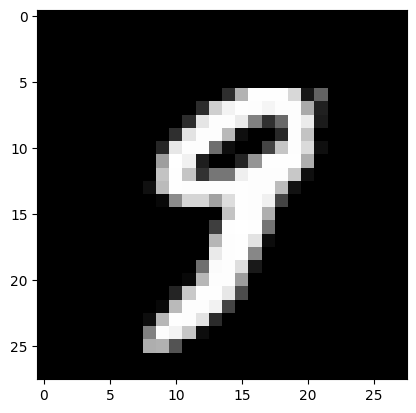

Prediction:  [9]
Label:  9


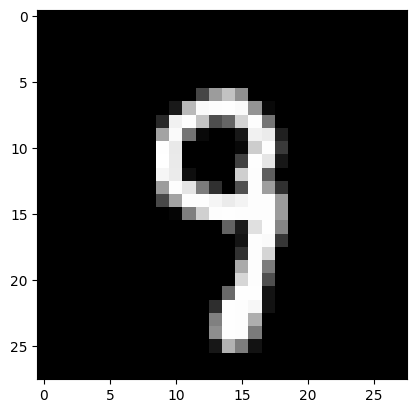

Prediction:  [0]
Label:  0


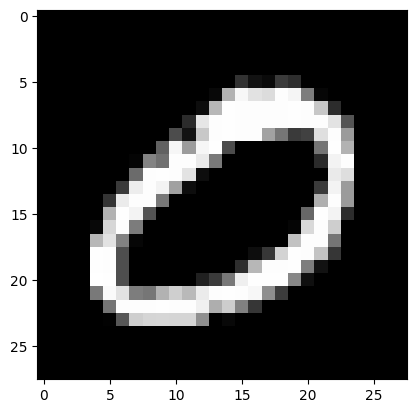

Prediction:  [8]
Label:  9


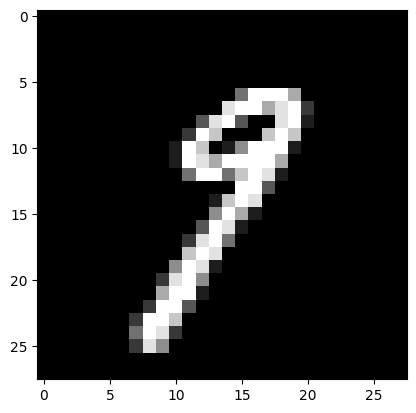

In [26]:
test_prediction(2, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)